# Read in the Data

In [32]:
library(devtools)
library(dplyr)
library(ggplot2)
library(repr)

In [3]:
install_github("cancerrxgene/gdscIC50",build_vignettes=TRUE)
library(gdscIC50)
install_github("cancerrxgene/gdscdata",build_vignettes=FALSE)
library(gdscdata)
data("gdsc_nlme_stats")

Skipping install of 'gdscIC50' from a github remote, the SHA1 (5ab42dfd) has not changed since last install.
  Use `force = TRUE` to force installation
Skipping install of 'gdscdata' from a github remote, the SHA1 (61dd771f) has not changed since last install.
  Use `force = TRUE` to force installation


In [6]:
drugset_id <- c("505_a_5","506_e_6","508_b_5","505_b_5"
                ,"505_e_16", "506_a_5", "506_b_6", "505_a_6", "506_c_6", "506_d_6",
                "506_f_6", "505_a_16", "506_f_16", "507_b_6", "508_b_6",
                 "507_b_5", "507_c_5", "507_d_5", "506_f_5", "506_g_5",
                 "505_c_5", "506_h_5", "508_c_5", "505_d_5", "506_i_5",
                 "506_j_16", "507_e_16", "508_d_16", "508_e_16", "508_f_16",
                "505_e_5", "506_j_5", "507_e_5", "508_g_5", "508_g_16", "505_f_5",
                "506_k_5", "507_f_5", "508_h_5", "505_f_16", "506_k_16", "507_f_16",
                "508_h_16")
# microplates filtering

In [11]:
gdsc_useful <- gdsc_nlme_stats %>% filter(DRUGSET_ID %in% drugset_id) %>% select(CL,CELL_LINE_NAME,maxc,DRUG_ID_lib,drug,IC50) 
gdsc_useful <- unique(gdsc_useful)

In [16]:
length(unique(gdsc_useful$CL))

[1] 986

In [12]:
gdsc_useful <- gdsc_useful %>% mutate(rel_IC50=exp(IC50)/maxc)
gdsc_useful <- gdsc_useful %>% filter(rel_IC50>8 | rel_IC50<0.2) %>% mutate(EFFECT= rel_IC50<0.2)

In [14]:
head(gdsc_useful)

CL,CELL_LINE_NAME,maxc,DRUG_ID_lib,drug,IC50,rel_IC50,EFFECT
683665,MC-CAR,2e+03,1001,1001_2000,5.248496,0.09513990,TRUE
683665,MC-CAR,1e-01,1003,1003_0.1,-4.526487,0.10818620,TRUE
683665,MC-CAR,1e-01,1004,1004_0.1,-5.123115,0.05957439,TRUE
683665,MC-CAR,2e+00,1006,1006_2,-2.955254,0.02603271,TRUE
683665,MC-CAR,5e-01,1010,1010_0.5,1.575241,9.66381402,FALSE
683665,MC-CAR,2e+00,1011,1011_2,-3.773649,0.01148405,TRUE


cell line No. 

In [17]:
saveRDS(gdsc_useful,"gdsc_useful.rds")

In [ ]:
?plotResponse

In [ ]:
plotResponse(model_stats=gdsc_nlme_stats,cell_line='683665',drug_identifier='1001_2000')

In [27]:
gdsc_1014 <- gdsc_useful %>% filter(DRUG_ID_lib==1014)

In [28]:
head(gdsc_1014)

CL,CELL_LINE_NAME,maxc,DRUG_ID_lib,drug,IC50,rel_IC50,EFFECT
683667,PFSK-1,5,1014,1014_5,3.9503193,10.3903905,FALSE
684055,ES3,5,1014,1014_5,3.8179091,9.1017907,FALSE
684059,ES7,5,1014,1014_5,4.1097610,12.1864303,FALSE
684062,EW-11,5,1014,1014_5,3.7389942,8.4111335,FALSE
687457,SW780,5,1014,1014_5,-0.1946045,0.1646320,TRUE
687592,YKG-1,5,1014,1014_5,-0.1393582,0.1739833,TRUE


In [36]:
gdsc_1014_effective = gdsc_1014 %>% filter(EFFECT==TRUE)
gdsc_1014_ineffective = gdsc_1014 %>% filter(EFFECT==FALSE)

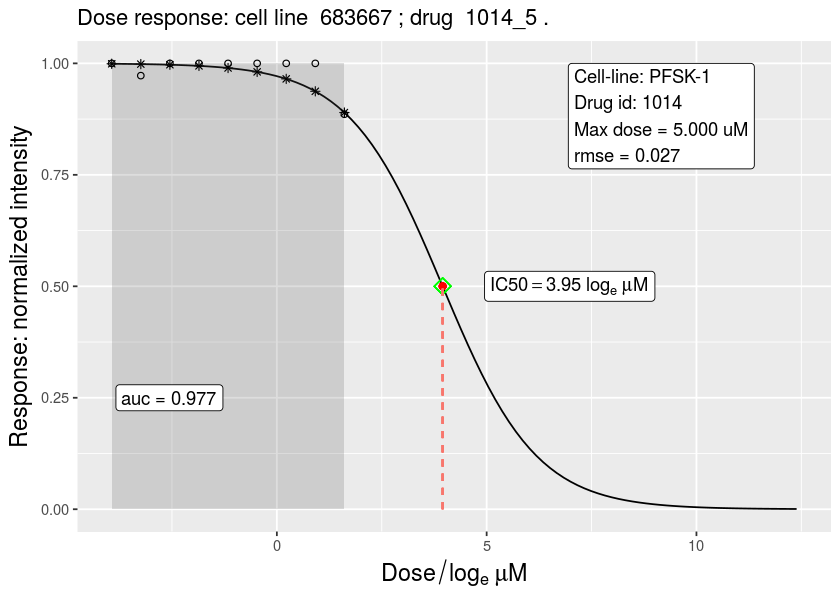

In [35]:
options(repr.plot.width=7,repr.plot.height=5)
plotResponse(model_stats=gdsc_nlme_stats,cell_line='683667',drug_identifier='1014_5')